A detailed analysis of Telco's business data, seeking insights into mitigating churn rate.

In [ ]:
# Import dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Load data for analysis
data = pd.read_csv('telco.csv')

In [ ]:
# Catch a sight of the dataset by viewing the first 2 columns
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
# Rename columns into standard format
data = data.rename(columns={
    'customerID': 'customer_id',
    'gender': 'gender',
    'SeniorCitizen': 'senior_citizen',
    'Partner': 'partner',
    'Dependents': 'dependents',
    'tenure': 'tenure',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'InternetService': 'internet_service',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'Contract': 'contract',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'MonthlyCharges': 'monthly_charges',
    'TotalCharges': 'total_charges',
    'Churn': 'churn'
})


In [ ]:
# View table again to verify that renaming of columns was successful
data.head(2)

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


Data Overview

In [ ]:
# Check for the presence of null values
data.isnull().sum()

,0
customer_id,0
gender,0
senior_citizen,0
partner,0
dependents,0
tenure,0
phone_service,0
multiple_lines,0
internet_service,0
online_security,0


There're clearly no missing values

In [ ]:
# Check for the presence of duplicate data
data[data.duplicated()]

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn


In [ ]:
# Visualize the statistical overview
data.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [ ]:
# View the datatypes for possible tweaks
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   gender             7043 non-null   object 
 2   senior_citizen     7043 non-null   int64  
 3   partner            7043 non-null   object 
 4   dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   phone_service      7043 non-null   object 
 7   multiple_lines     7043 non-null   object 
 8   internet_service   7043 non-null   object 
 9   online_security    7043 non-null   object 
 10  online_backup      7043 non-null   object 
 11  device_protection  7043 non-null   object 
 12  tech_support       7043 non-null   object 
 13  streaming_tv       7043 non-null   object 
 14  streaming_movies   7043 non-null   object 
 15  contract           7043 non-null   object 
 16  paperless_billing  7043 

Adjust datatypes

In [ ]:
# Total charges should be numeric
data["total_charges"] = pd.to_numeric(data["total_charges"], errors="coerce")

Data Cleaning

In [ ]:
# Find percentage missing values after datatype alteration due to natural incorrect format
def get_percent_missing_values(data):
  for col in data.columns:
    percent_missing_value = (data[col].isnull().sum()/len(data)) * 100
    print(f"The percentage of missing values of the {col} column is {percent_missing_value:.2f}%")
get_percent_missing_values(data)

The percentage of missing values of the customer_id column is 0.00%
The percentage of missing values of the gender column is 0.00%
The percentage of missing values of the senior_citizen column is 0.00%
The percentage of missing values of the partner column is 0.00%
The percentage of missing values of the dependents column is 0.00%
The percentage of missing values of the tenure column is 0.00%
The percentage of missing values of the phone_service column is 0.00%
The percentage of missing values of the multiple_lines column is 0.00%
The percentage of missing values of the internet_service column is 0.00%
The percentage of missing values of the online_security column is 0.00%
The percentage of missing values of the online_backup column is 0.00%
The percentage of missing values of the device_protection column is 0.00%
The percentage of missing values of the tech_support column is 0.00%
The percentage of missing values of the streaming_tv column is 0.00%
The percentage of missing values of 

In [ ]:
# Replace the missing value of the total_charges column with the median to mitigate the influence of outliers
data["total_charges"] = data["total_charges"].fillna(data["total_charges"].median())

In [ ]:
# Confirm the absence of missing values
get_percent_missing_values(data)

The percentage of missing values of the customer_id column is 0.00%
The percentage of missing values of the gender column is 0.00%
The percentage of missing values of the senior_citizen column is 0.00%
The percentage of missing values of the partner column is 0.00%
The percentage of missing values of the dependents column is 0.00%
The percentage of missing values of the tenure column is 0.00%
The percentage of missing values of the phone_service column is 0.00%
The percentage of missing values of the multiple_lines column is 0.00%
The percentage of missing values of the internet_service column is 0.00%
The percentage of missing values of the online_security column is 0.00%
The percentage of missing values of the online_backup column is 0.00%
The percentage of missing values of the device_protection column is 0.00%
The percentage of missing values of the tech_support column is 0.00%
The percentage of missing values of the streaming_tv column is 0.00%
The percentage of missing values of 

Data now looks free of missing values

Exploratory Data Analysis

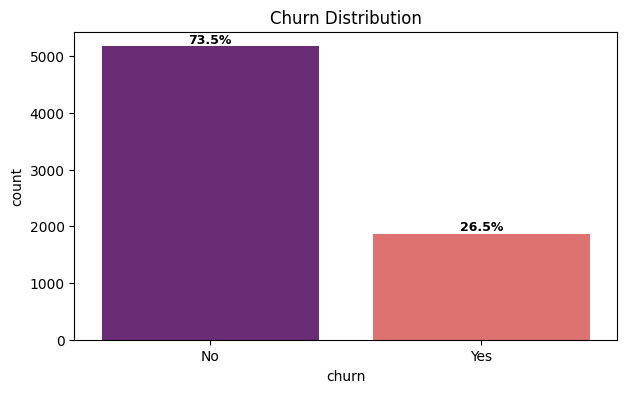

In [ ]:
# Figure Churn distribution

# Plot figure size
plt.figure(figsize=(7, 4))

# Create a countplot to visualize the churn distributions
count_plot = sns.countplot(x="churn", data=data,hue="churn", palette="magma")

# Set title
plt.title("Churn Distribution")

# Calculate the percentage churn rate

# Total number of customers
total_customers = len(data)

for each_plot in count_plot.patches:
  # Percentage of total customers for each countplot
    percentage = f'{100 * each_plot.get_height() / total_customers:.1f}%'
    count_plot.annotate(percentage,
                (each_plot.get_x() + each_plot.get_width() / 2., each_plot.get_height()),
                ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')

# Display the countplot
plt.show()

The above countplot show a record of 26.5% churn rate

But, for indepth insights, it's important to drill-down the monthly Charges by Churn

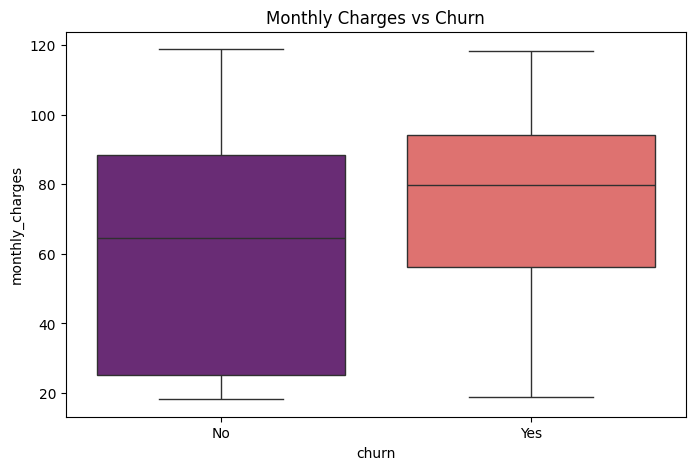

In [ ]:
# Draw the figure layout
plt.figure(figsize=(8, 5))

# Add the box-plot
sns.boxplot(x="churn", y="monthly_charges", data=data, hue="churn", palette="magma")

# Set the title
plt.title("Monthly Charges vs Churn")

# Display the box-plot
plt.show()

The monthly changes in churn fore-tells doomms-day ahead, and suggests a re-evaluation of responsible factors

Let's see churn rate by gender

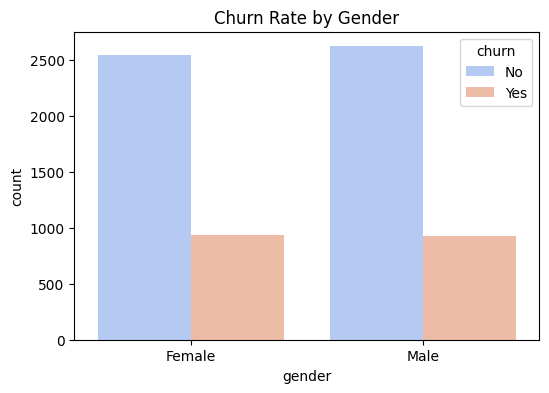

In [ ]:
# Plot the playout figure
plt.figure(figsize=(6, 4))

# Draw the countplot
sns.countplot(x="gender", hue="churn", data=data, palette="coolwarm")

# Add title
plt.title("Churn Rate by Gender")

# Display plot
plt.show()

Untimate;y, the churn rate has nothing to do with gender bias

But, let's peruse through the churn rate by the allocated contract type

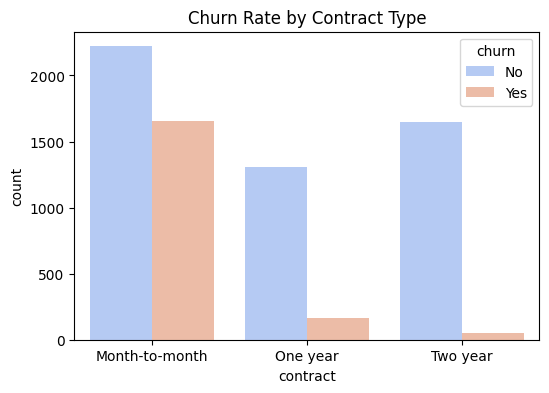

In [ ]:
# Plot the layout
plt.figure(figsize=(6, 4))

# Draw the countplot
sns.countplot(x="contract", hue="churn", data=data, palette="coolwarm")

# Set a title
plt.title("Churn Rate by Contract Type")

# Display the plot
plt.show()

the above shows that there is a running displeasure amongst customers who are allocated month-to-month contract, presenting an insight for review in form of offering incentives to encourage month-to-month contract or tilting strategy towards the yearly contracts as shown - This is to mitigate further damage

Data Processing

In [ ]:
# Check for unique churn values
data.churn.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
# Convert churn feature from an object type into a binary since machine learning models only read numbers
data.churn = data.churn.map({'No':0,'Yes':1})

In [ ]:
# Check for unique gender values
data.gender.unique()

array(['Female', 'Male'], dtype=object)

In [ ]:
# Encode the gender with the "LabelEncoder" feature since it only has 2 variables
label_encoder = LabelEncoder()
data.gender = label_encoder.fit_transform(data["gender"])

In [ ]:
# Collect the numerical columns for data merging when needed down the line
numerical_columns = ['senior_citizen','monthly_charges','total_charges']

In [ ]:
# Collect the categorically nominal features with over 2 value types for one-hot-encoding
nominal_columns = ['partner', 'dependents', 'phone_service', 'multiple_lines',
    'internet_service', 'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies', 'contract',
    'paperless_billing', 'payment_method']


# data_encoded = pd.get_dummies(data, columns=nominal_columns, drop_first=True).astype(int)

# data_encoded = data_encoded.fillna(0)

In [ ]:
# Encode the categorically norminal features
encoded_data = pd.get_dummies(data[nominal_columns], columns=nominal_columns, drop_first=True).astype(int)

In [ ]:
encoded_data.head(3)

,partner_Yes,dependents_Yes,phone_service_Yes,multiple_lines_No phone service,multiple_lines_Yes,internet_service_Fiber optic,internet_service_No,online_security_No internet service,online_security_Yes,online_backup_No internet service,...,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_One year,contract_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1


In [ ]:
# Print the datatypes to be assured of numerical data for model training
print(encoded_data.dtypes)

partner_Yes                               int64
dependents_Yes                            int64
phone_service_Yes                         int64
multiple_lines_No phone service           int64
multiple_lines_Yes                        int64
internet_service_Fiber optic              int64
internet_service_No                       int64
online_security_No internet service       int64
online_security_Yes                       int64
online_backup_No internet service         int64
online_backup_Yes                         int64
device_protection_No internet service     int64
device_protection_Yes                     int64
tech_support_No internet service          int64
tech_support_Yes                          int64
streaming_tv_No internet service          int64
streaming_tv_Yes                          int64
streaming_movies_No internet service      int64
streaming_movies_Yes                      int64
contract_One year                         int64
contract_Two year                       

In [ ]:
# Merge all data in one piece
final_data = pd.concat([data[numerical_columns],data.gender,data.churn,encoded_data],axis=1)

In [ ]:
final_data.columns

Index(['senior_citizen', 'monthly_charges', 'total_charges', 'gender', 'churn',
       'partner_Yes', 'dependents_Yes', 'phone_service_Yes',
       'multiple_lines_No phone service', 'multiple_lines_Yes',
       'internet_service_Fiber optic', 'internet_service_No',
       'online_security_No internet service', 'online_security_Yes',
       'online_backup_No internet service', 'online_backup_Yes',
       'device_protection_No internet service', 'device_protection_Yes',
       'tech_support_No internet service', 'tech_support_Yes',
       'streaming_tv_No internet service', 'streaming_tv_Yes',
       'streaming_movies_No internet service', 'streaming_movies_Yes',
       'contract_One year', 'contract_Two year', 'paperless_billing_Yes',
       'payment_method_Credit card (automatic)',
       'payment_method_Electronic check', 'payment_method_Mailed check'],
      dtype='object')

In [ ]:
# Look out for missing values
final_data.isnull().sum()

,0
senior_citizen,0
monthly_charges,0
total_charges,0
gender,0
churn,0
partner_Yes,0
dependents_Yes,0
phone_service_Yes,0
multiple_lines_No phone service,0
multiple_lines_Yes,0


Machine Learning

In [ ]:
# Define featres and target data in form of (x) and (y)
x = final_data.drop(columns=['churn'])  # Drop churn (target) and customer_id (not useful for prediction)
y = final_data['churn']

# Split data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits to avoid data leakage
print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")


Training data shape: (5634, 29)
Test data shape: (1409, 29)


In [ ]:
# Initialize the choice classification models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(eval_metric='logloss')
}

# Declare a dictionary to collect the trained and evaluated model
results = {}

for model_name, model in models.items():
    # train the model
    model.fit(x_train, y_train)

    # Predict on the test dataset
    prediction = model.predict(x_test)

    # Provide an Evaluation for the the model
    model_accuracy = accuracy_score(y_test, prediction)
    performance_report = classification_report(y_test, prediction, output_dict=True)

    # Store the results
    results[model_name] = {
        'Accuracy': model_accuracy,
        # Precision report for churned customers
        'Precision': performance_report['1']['precision'],
        # recall scores for churned customers
        'Recall': performance_report['1']['recall'],
        # F1 scores for churned customers
        'F1 Score': performance_report['1']['f1-score']
    }

    print(f"The classification report for {model_name} is: Classification Report:\n", classification_report(y_test, prediction))
    print(f"The Confusion Matrix for {model_name} is :\n", confusion_matrix(y_test, prediction))
    print("\n")

# Display the results in a DataFrame
results_df = pd.DataFrame(results).T
print(results_df.sort_values(by='F1 Score', ascending=False))


The classification report for Logistic Regression is: Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86      1035
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.78      0.79      0.79      1409

The Confusion Matrix for Logistic Regression is :
 [[922 113]
 [178 196]]




/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


The classification report for Random Forest is: Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

The Confusion Matrix for Random Forest is :
 [[929 106]
 [190 184]]


The classification report for Gradient Boosting is: Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.87      1035
           1       0.66      0.50      0.57       374

    accuracy                           0.80      1409
   macro avg       0.74      0.70      0.72      1409
weighted avg       0.79      0.80      0.79      1409

The Confusion Matrix for Gradient Boosting is :
 [[936  99]
 [186 188]]


The classification report for XGBoost is: Classificati

From the F1 scores the best performing model is the GradientBoostingClassifier

In [ ]:
best_performing_model = GradientBoostingClassifier()

# Train data with best performing model
best_performing_model.fit(x_train, y_train)

# Make predictions on the test set
model_prediction = best_performing_model.predict(x_test)

In [ ]:
model_prediction

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Define the performing GradientBoostingClassifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameter grid
param_grid = {
    # Number of trees to improve accuracy
    'n_estimators': [100, 200, 300, 500],
    # Learning rate to adjust how much the model learns from mistakes
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    # Split trees into far-reaching depths for precise patterns
    'max_depth': [3, 4, 5, 6],
    # Minimum samples rows for a split
    'min_samples_split': [2, 5, 10],
    # Minimum samples per leaf for model performance intensity
    'min_samples_leaf': [1, 2, 4],
    # Fraction of data used per tree to manage overfitting
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Perform cross validation using randomized search to find the best collections of hyperparameters
random_search = RandomizedSearchCV(
    gradient_boosting_model, param_distributions=param_grid,
    n_iter=30, cv=5, scoring='accuracy',
    random_state=42, n_jobs=-1, verbose=2
)

# Train on data based on differently randomized parameters as stated above
random_search.fit(x_train, y_train)

# Get the best hperparameters
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.01}


In [ ]:
# Collect all hyperparameters into the model
best_performing_model = GradientBoostingClassifier(**best_params, random_state=42)

# Train the best model
best_performing_model.fit(x_train, y_train)

# Make model predictions on the test set
y_pred = best_performing_model.predict(x_test)

In [ ]:
# Evaluate the model for performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy after tuning: {accuracy:.4f}")
print("\nClassification Report:\n", report)


Accuracy after tuning: 0.8048

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1035
           1       0.68      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
# Test the now parameterized model

best_performing_model = GradientBoostingClassifier()

# Train the dataset
best_performing_model.fit(x_train, y_train)

# Make predictions on the test data
model_prediction = best_performing_model.predict(x_test)

# Future predictions on new data (example: new_data)
# new_data = pd.DataFrame(new_customer_data)  # Replace with your actual new data
# new_data_encoded = encoder.transform(new_data)  # Encode as per your encoding logic
# future_predictions = best_performing_model.predict(new_data_encoded)


In [ ]:
model_prediction

array([0, 1, 0, ..., 0, 0, 0])

Validate the Model

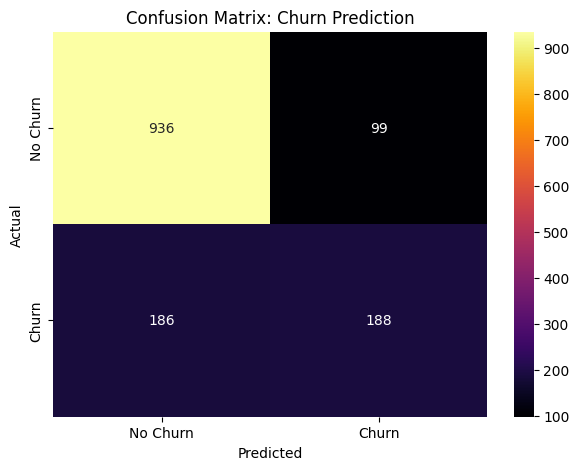

In [ ]:
# Predict test data
y_prediction = best_performing_model.predict(x_test)

# Generate confusion matrix to determine the positive and nrgative biases
con_matrix = confusion_matrix(y_test, y_prediction)
labels = ['No Churn', 'Churn']

# Plot confusion matrix
plt.figure(figsize=(7, 5))
sns.heatmap(con_matrix, annot=True, fmt='d', cmap='inferno', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix: Churn Prediction")
plt.show()


From the confusion matrix, the model has more true positives and negatives than the false negaties.

Visualize customer who are likely to churn and one who will not.

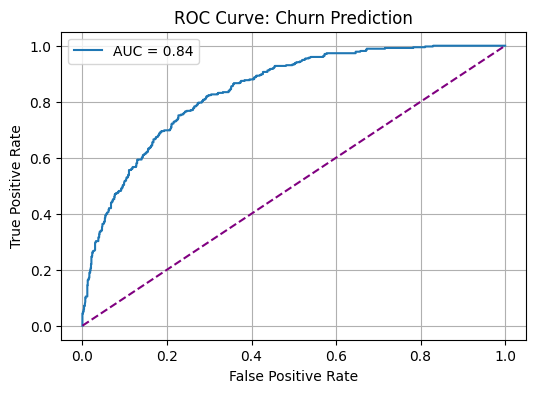

In [ ]:

from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_prob = best_performing_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="purple")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Churn Prediction")
plt.legend()
plt.grid(True)
plt.show()


The ROC curve above shows that at 84% of the time, the model is able to correctly distinguish between a customer who will churn vs one who will not.

Feature responsible for the performance of the model - This would provide more insights into the areas to focus on to curb customer churn

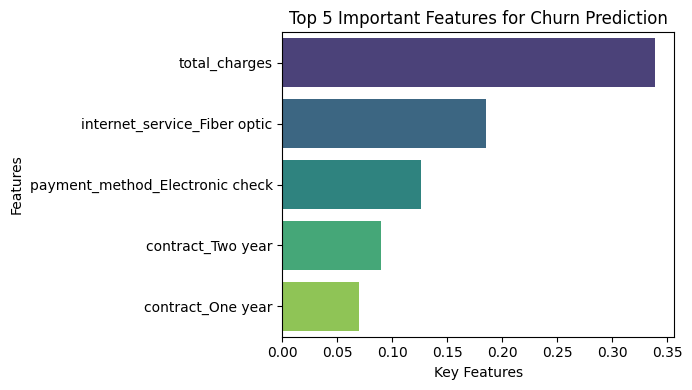

In [ ]:
# Get influential features
key_features = best_performing_model.feature_importances_
features = x_train.columns

# Create DataFrame
importances_df = pd.DataFrame({'Feature': features, 'Importance': key_features})

# sort the features accordingly
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the chart
plt.figure(figsize=(7, 4))
sns.barplot(x='Importance', y='Feature', hue='Feature', data=importances_df.head(5), palette='viridis')
plt.title("Top 5 Important Features for Churn Prediction")
plt.xlabel("Key Features")
plt.ylabel("Features")
plt.tight_layout()
plt.show()
